<a href="https://colab.research.google.com/github/leokim-material/interviews_scheduled/blob/main/report_interviews_scheduled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

loop folder 'weekly' with each coordinator in this folder

In [9]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
from matplotlib import dates #to set x axis date interval to every 7 days

from google.colab import files

Save graphs as png? Type y: 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


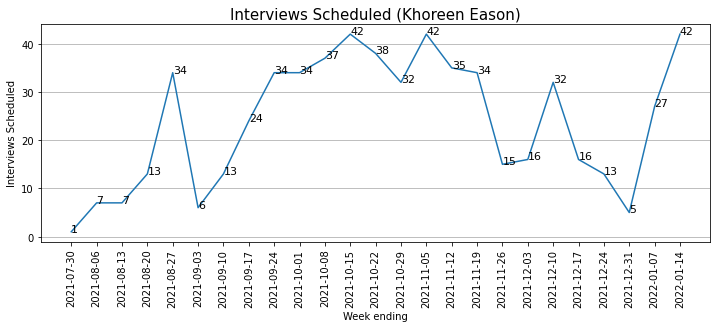

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


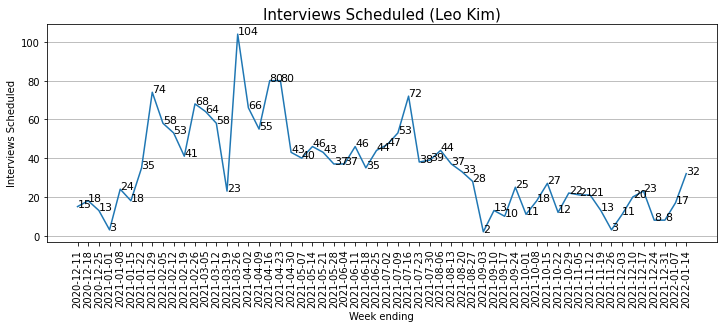

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


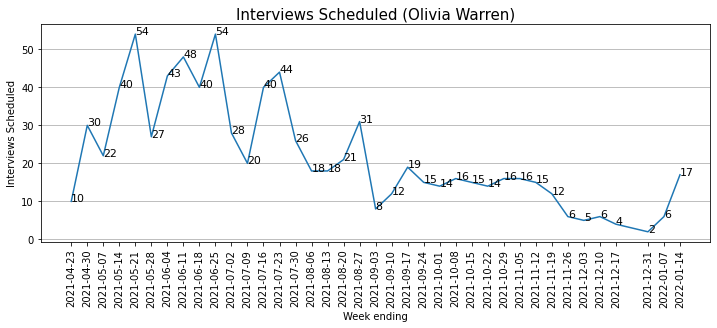

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


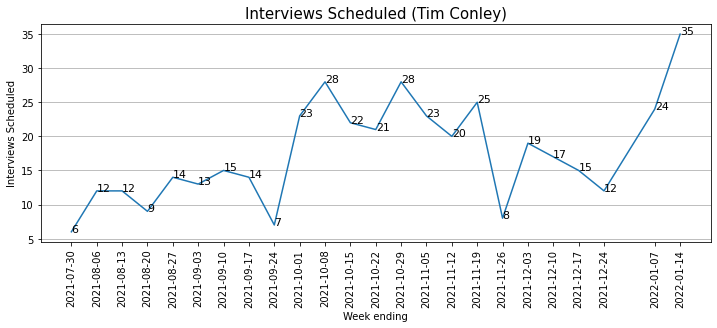

In [10]:
#list of coordinators
coordinators = ['Khoreen Eason', 'Leo Kim', 'Olivia Warren', 'Tim Conley']
save_graphs = input('Save graphs as png? Type y: ')

#setup folder & files
directory = 'drive/MyDrive/Colab Notebooks/report-interviews scheduled/gh usage'
folder = os.listdir(directory)

docs = sorted([doc for doc in folder])

df_all_weeks = pd.DataFrame()
for doc in docs:
  df = pd.read_excel(directory + '/' + doc, header=3)
  df['date'] = doc[-15:].split('.')[0]
  df_all_weeks = pd.concat([df_all_weeks, df])

for coordinator in coordinators:
  df_Coordinator = df_all_weeks.loc[df_all_weeks['User'] == coordinator]
  df_Coordinator['date'] = pd.to_datetime(df_Coordinator['date'])
  df_Coordinator = df_Coordinator.sort_values(by='date')

  plt.rcParams["figure.figsize"]=(12,4)
  fig = plt.figure()
  ax = fig.add_subplot()

  plt.title("Interviews Scheduled (" + coordinator + ")", fontdict = {'fontsize' : 15})
  plt.grid(axis='y')
  plt.xlabel('Week ending')
  plt.ylabel('Interviews Scheduled')
  plt.plot(df_Coordinator['date'], df_Coordinator['Interviews Scheduled'], label='Interviews Scheduled')
  plt.xticks(rotation=90)
  plt.xticks(df_Coordinator['date'])

  #annotate each dot with value +1 on the y-axis
  for i,j in zip(df_Coordinator['date'],df_Coordinator['Interviews Scheduled']):
      ax.annotate(str(j),xy=(i,j), size=11)

  #add moving average line
  # df_Coordinator[ 'rolling_avg' ] = df_Coordinator['Interviews Scheduled'].rolling(4).mean()
  # plt.plot(df_Coordinator['date'], df_Coordinator['rolling_avg'], label='Moving Average (4)')

  # ax.legend(loc='upper left')
  
  if save_graphs == 'y':
    plt.savefig(coordinator + '.png', bbox_inches='tight', dpi=300)
    files.download(coordinator + '.png')
  else:
    pass

  plt.show()
